In [ ]:
import pandas as pd
data = pd.read_csv("combined_data.csv")
print(data.head())
data.columns

        State  2020-01_Zillow  2020-02_Zillow  2020-03_Zillow  2020-04_Zillow  \
0     Alabama   163344.497952   164399.843436   165482.148383   166608.063161   
1      Alaska   314003.626425   314802.410243   315252.744695   315309.985366   
2     Arizona   278456.050256   281175.772228   284261.786373   287052.609093   
3    Arkansas   148877.155083   149440.714316   150229.430132   151368.637044   
4  California   548982.126058   551243.101453   553421.445048   555432.907586   

   2020-05_Zillow  2020-06_Zillow  2020-07_Zillow  2020-08_Zillow  \
0   167560.658871   168369.642326   169230.339532   170520.046903   
1   314517.745914   313406.653574   312834.718868   313709.807264   
2   288991.195918   290322.271888   291885.482320   294608.742357   
3   152318.008941   153083.488272   154007.611730   155367.853745   
4   555686.954993   554483.432019   554328.123012   557564.719057   

   2020-09_Zillow  ...  2020-06_COVID  2020-07_COVID  2020-08_COVID  \
0   172428.772784  ...     

Index(['State', '2020-01_Zillow', '2020-02_Zillow', '2020-03_Zillow',
       '2020-04_Zillow', '2020-05_Zillow', '2020-06_Zillow', '2020-07_Zillow',
       '2020-08_Zillow', '2020-09_Zillow', '2020-10_Zillow', '2020-11_Zillow',
       '2020-12_Zillow', '2021-01_Zillow', '2021-02_Zillow', '2021-03_Zillow',
       '2021-04_Zillow', '2021-05_Zillow', '2021-06_Zillow', '2021-07_Zillow',
       '2021-08_Zillow', '2021-09_Zillow', '2021-10_Zillow', '2021-11_Zillow',
       '2021-12_Zillow', '2022-01_Zillow', '2022-02_Zillow', '2022-03_Zillow',
       '2022-04_Zillow', '2022-05_Zillow', '2020-01_COVID', '2020-02_COVID',
       '2020-03_COVID', '2020-04_COVID', '2020-05_COVID', '2020-06_COVID',
       '2020-07_COVID', '2020-08_COVID', '2020-09_COVID', '2020-10_COVID',
       '2020-11_COVID', '2020-12_COVID', '2021-01_COVID', '2021-02_COVID',
       '2021-03_COVID'],
      dtype='object')

In [ ]:
#creating new columns to calculate the avg prices in each state per year
def home_yr_avg(data, year):
    zillow_columns = [col for col in data.columns if str(year) in col and '_Zillow' in col]
    data[zillow_columns] = data[zillow_columns].apply(pd.to_numeric, errors='coerce')
    data[f'{year}_Avg_Zillow'] = data[zillow_columns].mean(axis=1)

for year in [2020, 2021, 2022]:
    home_yr_avg(data, year)

data.head()

,State,2020-01_Zillow,2020-02_Zillow,2020-03_Zillow,2020-04_Zillow,2020-05_Zillow,2020-06_Zillow,2020-07_Zillow,2020-08_Zillow,2020-09_Zillow,...,2020-09_COVID,2020-10_COVID,2020-11_COVID,2020-12_COVID,2021-01_COVID,2021-02_COVID,2021-03_COVID,2020_Avg_Zillow,2021_Avg_Zillow,2022_Avg_Zillow
0,Alabama,163344.497952,164399.843436,165482.148383,166608.063161,167560.658871,168369.642326,169230.339532,170520.046903,172428.772784,...,1173.0,10734.0,1843.0,4190.0,5669.0,24110.0,1072.0,169855.574269,193148.797902,212096.551336
1,Alaska,314003.626425,314802.410243,315252.744695,315309.985366,314517.745914,313406.653574,312834.718868,313709.807264,315598.935246,...,94.0,31.0,144.0,121.0,168.0,72.0,258.0,315637.682010,331952.231888,349123.938658
2,Arizona,278456.050256,281175.772228,284261.786373,287052.609093,288991.195918,290322.271888,291885.482320,294608.742357,298905.222289,...,851.0,5375.0,3748.0,4517.0,6023.0,16539.0,47021.0,293697.082332,363213.055624,426898.982717
3,Arkansas,148877.155083,149440.714316,150229.430132,151368.637044,152318.008941,153083.488272,154007.611730,155367.853745,157263.400500,...,515.0,777.0,260.0,685.0,877.0,1701.0,5793.0,154522.834951,174401.620523,191300.448202
4,California,548982.126058,551243.101453,553421.445048,555432.907586,555686.954993,554483.432019,554328.123012,557564.719057,564750.084227,...,543.0,8564.0,41957.0,1817.0,2809.0,22060.0,291492.0,562502.230878,650386.563215,727460.123022


In [ ]:
#map of avg housing prices in 2020
import pandas as pd
import plotly.express as px

state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
data['State_Abbrev'] = data['State'].map(state_abbreviations)

fig = px.choropleth(
    data,
    locations='State_Abbrev',
    locationmode="USA-states",
    color='2020_Avg_Zillow',
    scope="usa",
    title="Average Zillow Housing Prices (2020)",
    labels={'2020_Avg_Zillow': 'Avg Price ($)'}
)

fig.update_layout(geo=dict(lakecolor='rgb(255, 255, 255)'))
fig.show()


In [ ]:
#map of avg housing prices in 2022
import pandas as pd
import plotly.express as px

state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
data['State_Abbrev'] = data['State'].map(state_abbreviations)

fig = px.choropleth(
    data,
    locations='State_Abbrev',
    locationmode="USA-states",
    color='2022_Avg_Zillow',
    scope="usa",
    title="Average Zillow Housing Prices (2022)",
    labels={'2020_Avg_Zillow': 'Avg Price ($)'}
)

fig.update_layout(geo=dict(lakecolor='rgb(255, 255, 255)'))
fig.show()

In [ ]:
data['Price_Difference'] = data['2022_Avg_Zillow'] - data['2020_Avg_Zillow']

fig_diff = px.choropleth(
    data,
    locations='State_Abbrev',
    locationmode="USA-states",
    color='Price_Difference',
    scope="usa",
    title="Change in Average Zillow Housing Prices (2022 vs 2020)",
    color_continuous_scale="RdYlGn",
    labels={'Price_Difference': 'Price Change ($)'}
)

fig_diff.update_layout(geo=dict(lakecolor='rgb(255, 255, 255)'))
fig_diff.show()

In [ ]:
data.head()

,State,2020-01_Zillow,2020-02_Zillow,2020-03_Zillow,2020-04_Zillow,2020-05_Zillow,2020-06_Zillow,2020-07_Zillow,2020-08_Zillow,2020-09_Zillow,...,2020-11_COVID,2020-12_COVID,2021-01_COVID,2021-02_COVID,2021-03_COVID,2020_Avg_Zillow,2021_Avg_Zillow,2022_Avg_Zillow,State_Abbrev,Price_Difference
0,Alabama,163344.497952,164399.843436,165482.148383,166608.063161,167560.658871,168369.642326,169230.339532,170520.046903,172428.772784,...,1843.0,4190.0,5669.0,24110.0,1072.0,169855.574269,193148.797902,212096.551336,AL,42240.977067
1,Alaska,314003.626425,314802.410243,315252.744695,315309.985366,314517.745914,313406.653574,312834.718868,313709.807264,315598.935246,...,144.0,121.0,168.0,72.0,258.0,315637.682010,331952.231888,349123.938658,AK,33486.256648
2,Arizona,278456.050256,281175.772228,284261.786373,287052.609093,288991.195918,290322.271888,291885.482320,294608.742357,298905.222289,...,3748.0,4517.0,6023.0,16539.0,47021.0,293697.082332,363213.055624,426898.982717,AZ,133201.900385
3,Arkansas,148877.155083,149440.714316,150229.430132,151368.637044,152318.008941,153083.488272,154007.611730,155367.853745,157263.400500,...,260.0,685.0,877.0,1701.0,5793.0,154522.834951,174401.620523,191300.448202,AR,36777.613251
4,California,548982.126058,551243.101453,553421.445048,555432.907586,555686.954993,554483.432019,554328.123012,557564.719057,564750.084227,...,41957.0,1817.0,2809.0,22060.0,291492.0,562502.230878,650386.563215,727460.123022,CA,164957.892145


In [ ]:
#creating new columns to calculate the avg covid cases in each state per year
def covid_yr_avg(data, year):
    covid_columns = [col for col in data.columns if str(year) in col and '_COVID' in col]
    data[covid_columns] = data[covid_columns].apply(pd.to_numeric, errors='coerce')
    data[f'{year}_Avg_COVID'] = data[covid_columns].mean(axis=1)

for year in [2020, 2021, 2022]:
    covid_yr_avg(data, year)

data.head()

,State,2020-01_Zillow,2020-02_Zillow,2020-03_Zillow,2020-04_Zillow,2020-05_Zillow,2020-06_Zillow,2020-07_Zillow,2020-08_Zillow,2020-09_Zillow,...,2021-02_COVID,2021-03_COVID,2020_Avg_Zillow,2021_Avg_Zillow,2022_Avg_Zillow,State_Abbrev,Price_Difference,2020_Avg_COVID,2021_Avg_COVID,2022_Avg_COVID
0,Alabama,163344.497952,164399.843436,165482.148383,166608.063161,167560.658871,168369.642326,169230.339532,170520.046903,172428.772784,...,24110.0,1072.0,169855.574269,193148.797902,212096.551336,AL,42240.977067,1753.583333,10283.666667,NaN
1,Alaska,314003.626425,314802.410243,315252.744695,315309.985366,314517.745914,313406.653574,312834.718868,313709.807264,315598.935246,...,72.0,258.0,315637.682010,331952.231888,349123.938658,AK,33486.256648,51.083333,166.000000,NaN
2,Arizona,278456.050256,281175.772228,284261.786373,287052.609093,288991.195918,290322.271888,291885.482320,294608.742357,298905.222289,...,16539.0,47021.0,293697.082332,363213.055624,426898.982717,AZ,133201.900385,1675.166667,23194.333333,NaN
3,Arkansas,148877.155083,149440.714316,150229.430132,151368.637044,152318.008941,153083.488272,154007.611730,155367.853745,157263.400500,...,1701.0,5793.0,154522.834951,174401.620523,191300.448202,AR,36777.613251,367.750000,2790.333333,NaN
4,California,548982.126058,551243.101453,553421.445048,555432.907586,555686.954993,554483.432019,554328.123012,557564.719057,564750.084227,...,22060.0,291492.0,562502.230878,650386.563215,727460.123022,CA,164957.892145,6601.250000,105453.666667,NaN


In [ ]:
#map of change in covid cases
data['COVID_Difference'] = data['2021_Avg_COVID'] - data['2020_Avg_COVID']

fig_diff = px.choropleth(
    data,
    locations='State_Abbrev',
    locationmode="USA-states",
    color='COVID_Difference',
    scope="usa",
    title="Change in Average # of COVID Case (2021 vs 2020)",
    color_continuous_scale="RdYlGn",
    labels={'Price_Difference': 'Price Change ($)'}
)

fig_diff.update_layout(geo=dict(lakecolor='rgb(255, 255, 255)'))
fig_diff.show()

In [ ]:
covid_columns_2020 = [col for col in data.columns if '2020' in col and '_COVID' in col]
covid_columns_2021 = [col for col in data.columns if '2021' in col and '_COVID' in col]
covid_columns_2022 = [col for col in data.columns if '2022' in col and '_COVID' in col]

data['Total_2020_COVID'] = data[covid_columns_2020].sum(axis=1)
data['Total_2021_COVID'] = data[covid_columns_2021].sum(axis=1)

data['Percent_Increase_2021_vs_2020'] = ((data['Total_2021_COVID'] - data['Total_2020_COVID']) /
                                         data['Total_2020_COVID']) * 100

data[['State', 'Total_2020_COVID', 'Total_2021_COVID',
      'Percent_Increase_2021_vs_2020']]


,State,Total_2020_COVID,Total_2021_COVID,Percent_Increase_2021_vs_2020
0,Alabama,22796.583333,41134.666667,80.442245
1,Alaska,664.083333,664.000000,-0.012549
2,Arizona,21777.166667,92777.333333,326.030322
3,Arkansas,4780.750000,11161.333333,133.464066
4,California,85816.250000,421814.666667,391.532392
5,Colorado,41025.833333,8993.333333,-78.078853
6,Connecticut,28354.083333,37413.333333,31.950425
7,Delaware,1604.416667,20072.000000,1151.046590
8,Florida,29094.000000,34902.666667,19.965170
9,Georgia,11176.750000,23942.666667,114.218504


<ipython-input-11-a2610a891035>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




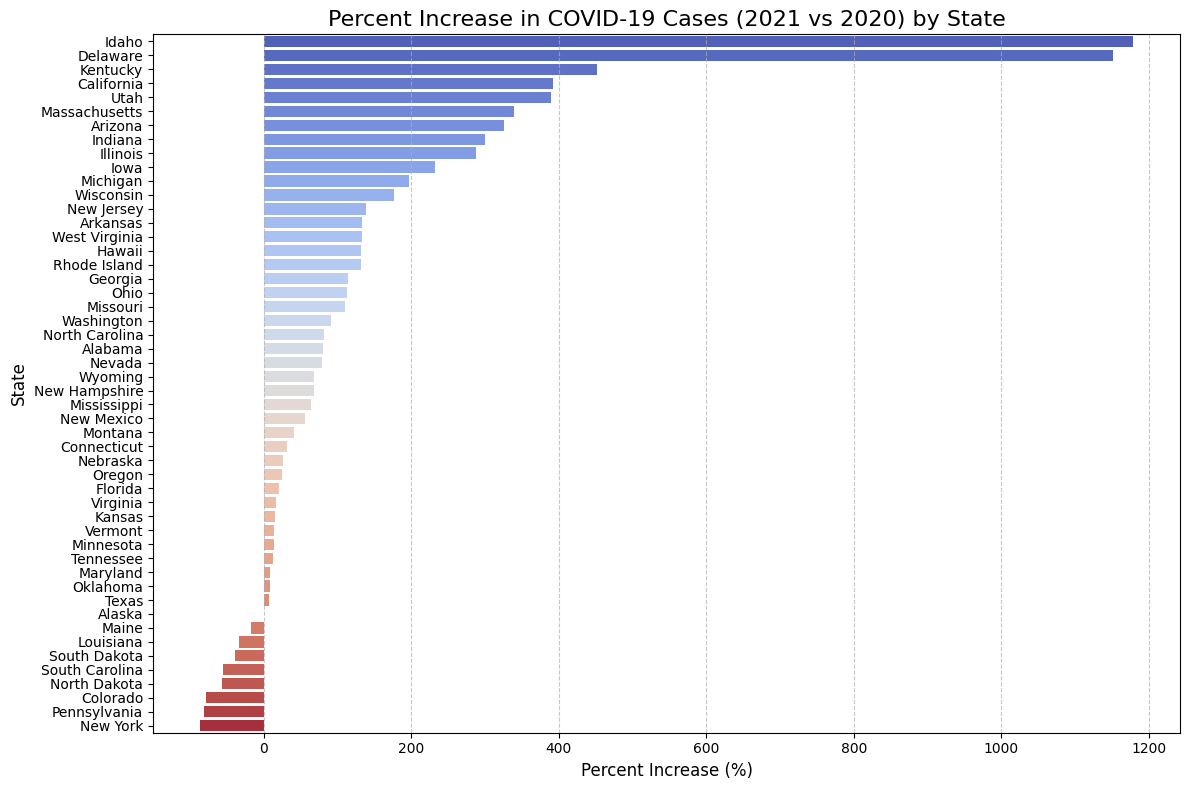

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#sort data by covid % increase
data_sorted = data.sort_values('Percent_Increase_2021_vs_2020', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Percent_Increase_2021_vs_2020',
    y='State',
    data=data_sorted,
    palette='coolwarm'
)

plt.title('Percent Increase in COVID-19 Cases (2021 vs 2020) by State', fontsize=16)
plt.xlabel('Percent Increase (%)', fontsize=12)
plt.ylabel('State', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
